In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Create Dataset

In [89]:
x,y = make_blobs(n_samples=500, centers=2, random_state=42, n_features=2)

x

array([[-2.98837186,  8.82862715],
       [-4.02438869, 10.3811604 ],
       [-3.48387929,  9.80137073],
       [-2.63711521,  8.05874569],
       [ 3.69047995,  4.60555175],
       [-4.04331179, 10.29196295],
       [ 2.16823434,  1.17627443],
       [-0.4484497 , 10.76962697],
       [-1.3297575 ,  8.54511048],
       [ 4.21969202,  1.69138508],
       [-3.6155326 ,  7.8180795 ],
       [ 6.30535328,  2.98753975],
       [-1.34603387,  9.02451919],
       [-1.6966718 , 10.37052616],
       [ 4.92965369,  4.04857048],
       [ 5.62420123,  1.75918084],
       [-0.36525353,  9.64820515],
       [ 5.2726607 ,  4.24386254],
       [-1.68665271,  7.79344248],
       [-1.06792433,  7.57842398],
       [ 3.86608964,  0.72851498],
       [-2.4449176 ,  7.93654135],
       [-2.46362578,  8.36268578],
       [ 5.57555723,  3.24472478],
       [ 4.27626662,  1.91622406],
       [-1.92234053, 11.20474175],
       [ 4.00249171,  3.16218622],
       [ 5.84109276,  1.56509431],
       [-0.86422991,

In [90]:
y

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

## Visualizing the data

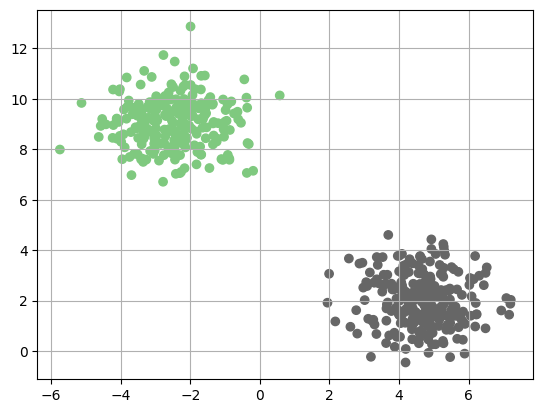

In [91]:
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.Accent)
plt.grid(True)
plt.show()

## <font color="green">Single Layer Perceptron</font>

*<strong>Sigmoid function :</strong> Returns the output for 0 to 1*

In [92]:
def sigmoid(z):
    return (1.0)/(1 + np.exp(-z))

*<strong>Predict function :</strong> Used for prediction by doing dot product of x and weights*

In [93]:
def predict(x,weights):
    # x = m * (n+1) where n is the column and 1 is the bias term
    # weights = (n+1) * 1

    z = np.dot(x,weights)
    prediction = sigmoid(z)
    return prediction

*<strong>Update function :</strong> Used to update the weights for each iteration*

In [94]:
def update(x,y,weights, learning_rate):
    # new weight = prev weight - learning rate * (dw/ total data)
    # total data = len(x) or x.shape[0]
    # dw = x transpose * (y_pred - y_real)

    total_data = x.shape[0]
    y_pred = predict(x,weights)
    dw = np.dot(x.T, y_pred - y)

    weights = weights - learning_rate * dw/float(total_data)

    return weights

*<strong>Loss function :</strong> Used to measure the difference between the actual data and the predicted data*

In [95]:
def loss(x,y,weights):
    y_pred = predict(x,weights)
    cost = np.mean(-y * np.log(y_pred) - (1-y) * np.log(1-y_pred))

    return cost

*<strong>Train function :</strong> Used to train the model*

In [96]:
def train(x,y,learning_rate, maxEpochs = 100):
    # creating bias term
    ones = np.ones((x.shape[0], 1))

    # adding dias to training data
    x = np.hstack((ones, x))

    # creating the initial weight
    weights = np.zeros(x.shape[1])

    # iterate the update the weight
    for epoch in range(maxEpochs): 
        weights = update(x,y,weights, learning_rate)

        # after training 10 times observe how much the model has learnt
        if epoch%10==0:
            l = loss(x,y,weights)
            print("Epoch number ",epoch," loss :",l)
        
    return weights

## Training the model

In [98]:
weights = train(x,y, learning_rate=0.01, maxEpochs=500)

Epoch number  0  loss : 0.6331746444524629
Epoch number  10  loss : 0.34998606616091815
Epoch number  20  loss : 0.24521135799944543
Epoch number  30  loss : 0.18837430639220945
Epoch number  40  loss : 0.15271682157614105
Epoch number  50  loss : 0.1283726272975551
Epoch number  60  loss : 0.11075404993558195
Epoch number  70  loss : 0.09743970729237163
Epoch number  80  loss : 0.08703655010055121
Epoch number  90  loss : 0.07868953876240707
Epoch number  100  loss : 0.07184634863690496
Epoch number  110  loss : 0.06613506792611655
Epoch number  120  loss : 0.061296484054339004
Epoch number  130  loss : 0.05714460334657668
Epoch number  140  loss : 0.05354261220901946
Epoch number  150  loss : 0.0503876895720263
Epoch number  160  loss : 0.04760110069663493
Epoch number  170  loss : 0.04512155366022024
Epoch number  180  loss : 0.04290063363668018
Epoch number  190  loss : 0.040899596366319756
Epoch number  200  loss : 0.03908707219963941
Epoch number  210  loss : 0.03743739333020477


In [99]:
weights

array([ 0.11197711,  1.00438561, -0.30978439])

## Visualization

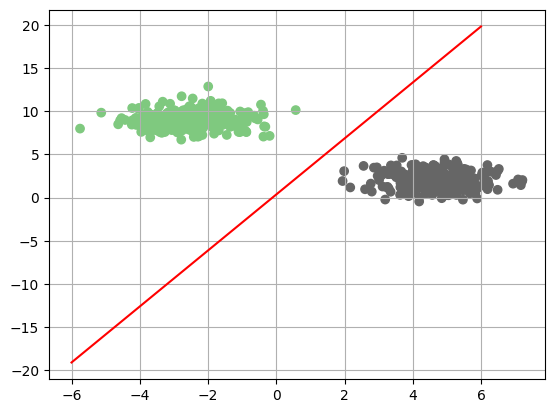

In [106]:
x1 = np.linspace(-6, 6, 10)
x2 = -(weights[0] + weights[1] * x1) / weights[2]

plt.scatter(x[:,0], x[:,1],c=y, cmap=plt.cm.Accent)
plt.plot(x1, x2, c='red')
plt.grid(True)
plt.show()

<font color="red">The problem with single layer perceptron is that it can only work on simple data. If the data is complex then it can not curve its line</font>